In [72]:
import thinkstats as ts 
import survey
import math

In [73]:
def pumpkin(pWeights):
    mean = ts.Mean(pWeights)
    variance = ts.Var(pWeights, mean)
    std = math.sqrt(variance)
    print 'The mean of the pumpkin weights is', mean
    print 'The variance of the pumpkin weights is', variance
    print 'The standard deviation of the pumpkin weights is', std
    print type(std)

pWeights = [1, 1, 1, 3, 3, 591]
pumpkin(pWeights)

The mean of the pumpkin weights is 100.0
The variance of the pumpkin weights is 48217.0
The standard deviation of the pumpkin weights is 219.583697027
<type 'float'>


In [74]:
def mean(seqNum):
    return float(sum(seqNum)) / len(seqNum)

def variance(seqNum, mu): 
    dev2 = [(x - mu)**2 for x in seqNum]
    var = mean(dev2)
    return var

def partitionRecords(table):
    firsts = survey.Pregnancies()
    others = survey.Pregnancies()

    for p in table.records:
        if p.outcome != 1:
            continue

        if p.birthord == 1:
            firsts.AddRecord(p)
        else:
            others.AddRecord(p)
    return firsts, others

def process(table):
    table.lengths = [p.prglength for p in table.records]
    table.n = len(table.lengths)
    table.mu = mean(table.lengths)
    table.v = variance(table.lengths, table.mu)
    table.std = math.sqrt(table.v)

def makeTables(data_dir='.'):
    table = survey.Pregnancies()
    table.ReadRecords(data_dir)
    firsts, others = partitionRecords(table)

    return table, firsts, others

def processTables(*tables):

    for table in tables:
        process(table)

def summarize(data_dir):

    table, firsts, others = makeTables(data_dir)
    processTables(firsts, others)

    print 'Number of first babies', firsts.n
    print 'Number of others', others.n

    mu1, mu2 = firsts.mu, others.mu
    std1, std2 = firsts.std, others.std 
    
    print 'Mean gestation in weeks:'
    print 'First babies', mu1
    print 'Others', mu2
    
    print 'Standard deviation gestation in weeks:'
    print 'First babies', std1
    print 'Others', std2

    print 'Difference in days', (mu1 - mu2) * 7.0

data = summarize('.')
data

Number of first babies 4413
Number of others 4735
Mean gestation in weeks:
First babies 38.6009517335
Others 38.5229144667
Standard deviation gestation in weeks:
First babies 2.79158506982
Others 2.61557611068
Difference in days 0.546260867443


In [75]:
def myPMF(seqNum): 
    hist = {}
    for x in seqNum:
        hist[x] = hist.get(x, 0) + 1 
    
    n = float(len(seqNum))
    pmf = {}
    for x, freq in hist.items(): 
        pmf[x] = freq / n 
    
    return pmf

values = [3, 4, 18, 18, 19, 2, 6, 10, 2, 56, 56]
myPMF(values)

{2: 0.18181818181818182,
 3: 0.09090909090909091,
 4: 0.09090909090909091,
 6: 0.09090909090909091,
 10: 0.09090909090909091,
 18: 0.18181818181818182,
 19: 0.09090909090909091,
 56: 0.18181818181818182}

In [76]:
import Pmf

In [77]:
hist = Pmf.MakeHistFromList([1, 2, 2, 3, 5])
hist.Freq(2)
hist.Values()

for num, freq in hist.Items():
    print num, freq

1 1
2 2
3 1
5 1


In [78]:
def mode(histObj): 
    newDict = {}
    for num in sorted(hist.Values()):
        newDict[num] = hist.Freq(num)
    sortedDict = sorted(newDict, key=newDict.__getitem__)
    return sortedDict[-1]

hist = Pmf.MakeHistFromList([1, 2, 2, 3, 3, 4, 4, 4, 5])
mode(hist)    

4

In [79]:
def sortByValueDec(dct): 
    sortedValues = sorted(dct.values(), reverse=True)
    sortedKeys = sorted(dct, reverse=True)
    return [(k, v) for (k, v) in sorted(dct.items(), key=lambda kv: kv[1], reverse=True)]


def allModes(histObj):
    newDict = {} 
    for num in sorted(hist.Values()): 
        newDict[num] = hist.Freq(num)
    return sortByValueDec(newDict)

hist = Pmf.MakeHistFromList([1, 2, 3, 3, 3, 8, 9, 10, 10, 10])
allModes(hist)


[(3, 3), (10, 3), (1, 1), (2, 1), (8, 1), (9, 1)]

In [70]:
import matplotlib.pyplot as pyplot

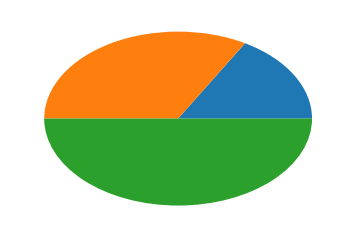

In [71]:
pyplot.pie([1, 2, 3])
pyplot.show()

In [80]:
def remainingLifeTimes(pmfObj, age):
    newLst = pmfObj.Items()
    newLst.append(age)
    pmfObj = Pmf.MakePmfFromList(newLst)
    return pmfObj

pmfObj = Pmf.MakePmfFromList([23, 34, 55, 12, 67, 18])
remainingLifeTimes(pmfObj, 19)

In [101]:
def pmfMean(pmfObj): 
    mean = 0 
    for k, v in pmfObj.Items(): 
         mean += k * v
    return mean 

def pmfVar(pmfObj, mean):
    var = 0 
    for k, v in pmfObj.Items():
        var += v * (k - mean)**2 
    return var 

pmfObj = Pmf.MakePmfFromList([23, 34, 55, 12, 67, 18])

mean = pmfMean(pmfObj)
var = pmfVar(pmfObj, mean)



34.8333333333 34.8333333333
